NAMA : Derajat Salim Wibowo
NIM  : 2210511077
Asal : UPN Veteran Jakarta - Teknik Informatika

In [30]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Conv1D, MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

dataset :https://www.kaggle.com/datasets/rahulanand0070/youtubevideodataset

In [13]:
# Load dataset from Google Drive
df = pd.read_csv('/content/drive/MyDrive/ML/Youtube Video Dataset.csv')

In [14]:
df.head()

,Title,Videourl,Category,Description
0,Madagascar Street Food!!! Super RARE Malagasy ...,/watch?v=EwBA1fOQ96c,Food,🎥GIANT ALIEN SNAIL IN JAPAN! » https://youtu.b...
1,42 Foods You Need To Eat Before You Die,/watch?v=0SPwwpruGIA,Food,This is the ultimate must-try food bucket list...
2,Gordon Ramsay’s Top 5 Indian Dishes,/watch?v=upfu5nQB2ks,Food,We found 5 of the best and most interesting In...
3,How To Use Chopsticks - In About A Minute 🍜,/watch?v=xFRzzSF_6gk,Food,You're most likely sitting in a restaurant wit...
4,Trying Indian Food 1st Time!,/watch?v=K79bXtaRwcM,Food,HELP SUPPORT SINSTV!! Shop Our Sponsors!\nLast...


In [15]:
df.shape

(11211, 4)

In [16]:
category = pd.get_dummies(df.Category)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='Category')
df_baru

,Title,Videourl,Description,Art&Music,Food,History,Science&Technology,manufacturing,travel blog
0,Madagascar Street Food!!! Super RARE Malagasy ...,/watch?v=EwBA1fOQ96c,🎥GIANT ALIEN SNAIL IN JAPAN! » https://youtu.b...,0,1,0,0,0,0
1,42 Foods You Need To Eat Before You Die,/watch?v=0SPwwpruGIA,This is the ultimate must-try food bucket list...,0,1,0,0,0,0
2,Gordon Ramsay’s Top 5 Indian Dishes,/watch?v=upfu5nQB2ks,We found 5 of the best and most interesting In...,0,1,0,0,0,0
3,How To Use Chopsticks - In About A Minute 🍜,/watch?v=xFRzzSF_6gk,You're most likely sitting in a restaurant wit...,0,1,0,0,0,0
4,Trying Indian Food 1st Time!,/watch?v=K79bXtaRwcM,HELP SUPPORT SINSTV!! Shop Our Sponsors!\nLast...,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
11206,"art journal | shimmer sprays, stencils, collag...",/watch?v=mJBOQr_-8_Y,Step by step video on creating an art journal ...,1,0,0,0,0,0
11207,Ar-Tea Collage * Mixed Media Art,/watch?v=GOihUhnZxtw,"By: Ilene McInnes,\nMixed media Art and inspir...",1,0,0,0,0,0
11208,DIY Mixed Media Art Collage Greeting Cards / M...,/watch?v=BchUtLfjews,Make your own Mixed Media Greeting Cards\n\nHe...,1,0,0,0,0,0
11209,Art Collage Process DecoJournal using Rice Pap...,/watch?v=FlQ_j-cflQc,Art Collage Process DecoJournal using Rice Pap...,1,0,0,0,0,0


In [17]:
df = df.drop(['Videourl','Description'], axis=1)
df.head()

,Title,Category
0,Madagascar Street Food!!! Super RARE Malagasy ...,Food
1,42 Foods You Need To Eat Before You Die,Food
2,Gordon Ramsay’s Top 5 Indian Dishes,Food
3,How To Use Chopsticks - In About A Minute 🍜,Food
4,Trying Indian Food 1st Time!,Food


In [19]:
print(df.Category.unique())

['Food' 'manufacturing' 'History' 'travel blog' 'Science&Technology'
 'Art&Music']


In [21]:
title = df_baru['Title'].values
label = df_baru[['Food', 'manufacturing', 'History', 'travel blog', 'Science&Technology',
 'Art&Music']].values

In [22]:
title_latih, title_test, label_latih, label_test = train_test_split(title, label, test_size = 0.2 )

In [23]:
tokenizer = Tokenizer(num_words=50000, oov_token='x')
tokenizer.fit_on_texts(title_latih) 
tokenizer.fit_on_texts(title_test)
 
sekuens_latih = tokenizer.texts_to_sequences(title_latih)
sekuens_test = tokenizer.texts_to_sequences(title_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [27]:
model = tf.keras.models.Sequential([
    Embedding(input_dim=50000, output_dim=16),
    Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling1D(pool_size=2),
    LSTM(units=64, return_sequences=True),
    LSTM(units=32),
    Dense(units=128, activation='relu'),
    Dropout(0.3),
    Dense(units=64, activation='relu'),
    Dropout(0.3),
    Dense(units=6, activation='sigmoid')
])

In [28]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
     

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 16)          800000    
                                                                 
 conv1d_1 (Conv1D)           (None, None, 32)          1568      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, None, 32)         0         
 1D)                                                             
                                                                 
 lstm_2 (LSTM)               (None, None, 64)          24832     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 128)               4224      
                                                      

In [29]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.90):
      print('\nakurasi telah mencapai 90%')
      self.model.stop_training = True

callbacks = myCallback()

num_epochs = 30
history = model.fit(padded_latih, label_latih, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/30
281/281 - 11s - loss: 1.3255 - accuracy: 0.4190 - val_loss: 0.6698 - val_accuracy: 0.7820 - 11s/epoch - 38ms/step
Epoch 2/30
281/281 - 5s - loss: 0.4062 - accuracy: 0.8695 - val_loss: 0.3633 - val_accuracy: 0.8908 - 5s/epoch - 17ms/step
Epoch 3/30

akurasi telah mencapai 90%
281/281 - 6s - loss: 0.1697 - accuracy: 0.9534 - val_loss: 0.3459 - val_accuracy: 0.9068 - 6s/epoch - 20ms/step


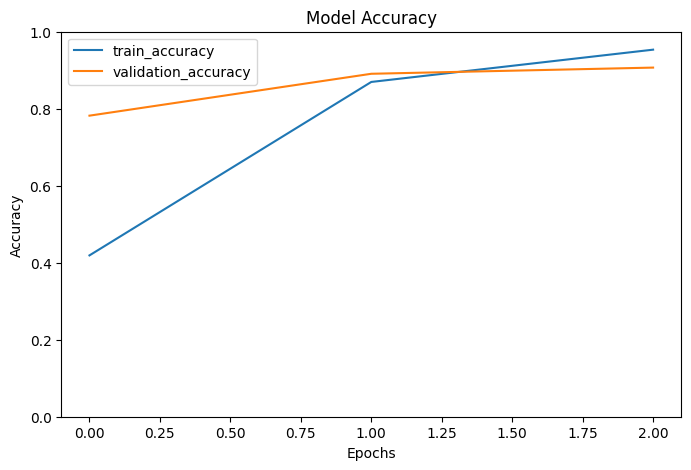

In [31]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(ymin=0, ymax=1)
plt.show()

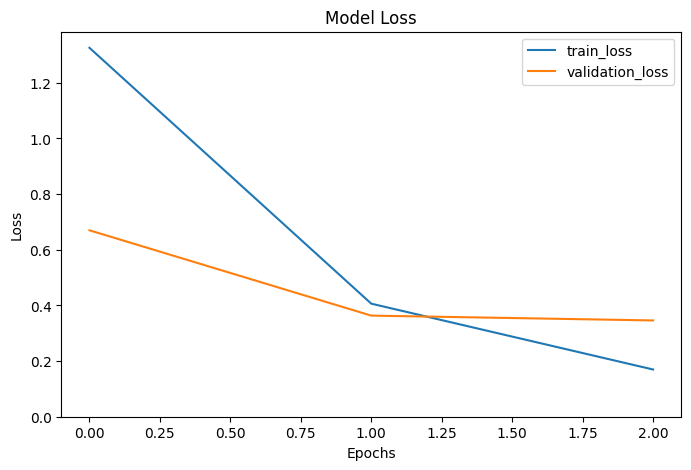

In [32]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim(ymin=0)
plt.show()